In [1]:
import csv
import re
with open('clean_data.csv') as csvfile:
    rows = csv.reader(csvfile)
    res = list(zip(*rows))

n_headerExcluded = 0
new_data_list = []
for row in res:
    new_row = []
    for item in row:
        new_item = re.sub('[^A-Za-z0-9\.?]', '', item)
        if(new_item == '' or new_item == 'NA'):
            new_item = 0
        new_row.append(new_item)
    new_data_list.append(new_row)


k = list(map(list, zip(*new_data_list)))
#print(k)

import csv
with open("clean_data_11.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(k)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
global headers

df = pd.read_csv('clean_data_11.csv')

#df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
#df.columns= headers
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()


,IPEDS,BlkTotalStudents,HispTotalStudents,2017USNewstop65,2014MedSchool,VetSchool,TotalEnroll,GradEnroll,Sixyeargraduationrate,ACTSATAvg,...,ProfessDegrees,ACTSAT25,ACTSAT75,StateTuitSt.FTE,AcademicSupportExpenditures,StudentServicesExpenditures,EndowmentFigure,EndowmentperStudentFTE,TotalFaculty.1,TotalTenureTenureTrackFacutly.1
52,153658,3,6,35,1.0,0,30844,24,72,25.5,...,490,23,28,23496,1251356000,46877,1251356000,46877,2320,1391
53,196088,6,5,43,1.0,0,29796,33,74,25.5,...,686,23,28,25099,624790675,23581,624790675,23581,1597,1128
54,230764,1,10,52,1.0,0,31592,25,64,24.5,...,383,21,28,22927,723827000,28036,723827000,28036,1712,1141
55,110671,4,33,58,1.0,0,21385,13,73,24.0,...,0,21,27,23444,136003000,6453,136003000,6453,844,682
56,104179,4,23,62,1.0,0,42595,22,61,24.0,...,411,0,0,21999,760679000,19705,760679000,19705,1820,1449


In [3]:
X = df.ix[:,0:57].values
y = df.ix[:,57].values
#print(x)
#print(y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [5]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.01785714e+00  1.25541804e-02 -3.17137467e-01 ...  3.38467789e-01
   3.32860105e-01  3.82293976e-01]
 [ 1.25541804e-02  1.01785714e+00 -3.66737589e-01 ... -1.38642671e-01
  -6.92302497e-02 -1.51886338e-01]
 [-3.17137467e-01 -3.66737589e-01  1.01785714e+00 ... -2.92645194e-04
  -1.16418242e-01 -3.46658698e-02]
 ...
 [ 3.38467789e-01 -1.38642671e-01 -2.92645194e-04 ...  1.01785714e+00
   9.24461915e-01  9.83898841e-01]
 [ 3.32860105e-01 -6.92302497e-02 -1.16418242e-01 ...  9.24461915e-01
   1.01785714e+00  8.84337162e-01]
 [ 3.82293976e-01 -1.51886338e-01 -3.46658698e-02 ...  9.83898841e-01
   8.84337162e-01  1.01785714e+00]]


In [6]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.01785714e+00  1.25541804e-02 -3.17137467e-01 ...  3.38467789e-01
   3.32860105e-01  3.82293976e-01]
 [ 1.25541804e-02  1.01785714e+00 -3.66737589e-01 ... -1.38642671e-01
  -6.92302497e-02 -1.51886338e-01]
 [-3.17137467e-01 -3.66737589e-01  1.01785714e+00 ... -2.92645194e-04
  -1.16418242e-01 -3.46658698e-02]
 ...
 [ 3.38467789e-01 -1.38642671e-01 -2.92645194e-04 ...  1.01785714e+00
   9.24461915e-01  9.83898841e-01]
 [ 3.32860105e-01 -6.92302497e-02 -1.16418242e-01 ...  9.24461915e-01
   1.01785714e+00  8.84337162e-01]
 [ 3.82293976e-01 -1.51886338e-01 -3.46658698e-02 ...  9.83898841e-01
   8.84337162e-01  1.01785714e+00]]


In [7]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 6.50875253e-02  4.08592563e-02  1.59321981e-01 ...  4.97220394e-06
  -3.35473284e-11  3.88573351e-11]
 [-6.70815436e-02  3.41510157e-02  8.87068473e-02 ...  5.50223290e-06
  -3.61540071e-11  4.32864129e-11]
 [ 1.86158055e-02  2.40483112e-02 -2.04253135e-01 ...  1.44122809e-05
  -9.37086672e-11  1.13470257e-10]
 ...
 [ 1.44986056e-01  2.18295677e-02  4.04055056e-02 ... -1.47480050e-04
   9.68666532e-10 -1.16457266e-09]
 [ 1.18605998e-01 -7.64746404e-02  9.64872515e-02 ...  1.06859577e-04
  -7.03952605e-10  8.42707270e-10]
 [ 1.50693939e-01  9.50854163e-03  3.69113167e-02 ...  5.66430088e-05
  -3.70390440e-10  4.48166355e-10]]

Eigenvalues 
[ 2.20300202e+01  6.40795429e+00  5.54278116e+00  4.17258343e+00
  2.90035028e+00  2.53880009e+00  2.12109666e+00  1.78163578e+00
  1.54667733e+00  1.38644628e+00  1.03735224e+00  9.76819752e-01
  7.19058592e-01  6.82524670e-01  5.81359631e-01  4.86140893e-01
  4.03861934e-01  3.65926995e-01  3.48236331e-01  2.71825717e-01
  2.4407191

In [8]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 6.50875253e-02  4.08592563e-02  1.59321981e-01 ... -4.97220327e-06
   1.99426611e-11 -1.17704261e-10]
 [-6.70815436e-02  3.41510157e-02  8.87068473e-02 ... -5.50223345e-06
   2.20139816e-11 -1.30242087e-10]
 [ 1.86158055e-02  2.40483112e-02 -2.04253135e-01 ... -1.44122832e-05
   5.75643074e-11 -3.40998493e-10]
 ...
 [ 1.44986056e-01  2.18295677e-02  4.04055056e-02 ...  1.47480060e-04
  -5.94311138e-10  3.48889622e-09]
 [ 1.18605998e-01 -7.64746404e-02  9.64872515e-02 ... -1.06859582e-04
   4.30297383e-10 -2.52818228e-09]
 [ 1.50693939e-01  9.50854163e-03  3.69113167e-02 ... -5.66430147e-05
   2.28441286e-10 -1.33991236e-09]]

Eigenvalues 
[ 2.16435286e+01  6.29553404e+00  5.44553938e+00  4.09938021e+00
  2.84946694e+00  2.49425974e+00  2.08388444e+00  1.75037901e+00
  1.51954264e+00  1.36212266e+00  1.01915308e+00  9.59682563e-01
  7.06443529e-01  6.70550553e-01  5.71160340e-01  4.77612105e-01
  3.96776636e-01  3.59507224e-01  3.42126922e-01  2.67056844e-01
  2.3978994

In [9]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 6.50875253e-02  4.08592563e-02  1.59321981e-01 ... -4.97220501e-06
   1.24482779e-10 -1.19546551e-11]
 [-6.70815436e-02  3.41510157e-02  8.87068473e-02 ... -5.50223334e-06
   1.37209388e-10 -1.28497850e-11]
 [ 1.86158055e-02  2.40483112e-02 -2.04253135e-01 ... -1.44122788e-05
   3.59114961e-10 -3.33155307e-11]
 ...
 [ 1.44986056e-01  2.18295677e-02  4.04055056e-02 ...  1.47480029e-04
  -3.67929666e-09  3.41451138e-10]
 [ 1.18605998e-01 -7.64746404e-02  9.64872515e-02 ... -1.06859568e-04
   2.66692242e-09 -2.48525261e-10]
 [ 1.50693939e-01  9.50854163e-03  3.69113167e-02 ... -5.66429979e-05
   1.41224701e-09 -1.30230269e-10]]

Eigenvalues 
[ 2.16435286e+01  6.29553404e+00  5.44553938e+00  4.09938021e+00
  2.84946694e+00  2.49425974e+00  2.08388444e+00  1.75037901e+00
  1.51954264e+00  1.36212266e+00  1.01915308e+00  9.59682563e-01
  7.06443529e-01  6.70550553e-01  5.71160340e-01  4.77612105e-01
  3.96776636e-01  3.59507224e-01  3.42126922e-01  2.67056844e-01
  2.3978994

[35.123797237083785, 18.943216201846955, 17.618051672500467, 15.28609407679539, 12.744395453048583, 11.923623822129574, 10.898688591785485, 9.98857366356613, 9.306660552009363, 8.811412587207414, 7.621792795230936, 7.396073694083013, 6.345650570515741, 6.182344340162978, 5.705798747897544, 5.217651769607282, 4.75565645065161, 4.526799282763756, 4.416020216377347, 3.901568932612786, 3.6970294812973608, 3.374648630664953, 3.1543940261077084, 2.945228457296528, 2.8229367962960104, 2.57018846861212, 2.4589398941024165, 2.3057078239827993, 1.9826146012115426, 1.9572399818874062, 1.852911317229088, 1.6481398785760988, 1.5502943303366443, 1.4456659129462748, 1.2377755334710527, 1.1347816929708978, 1.0556412356987226, 0.9645956257712373, 0.8819423820325419, 0.7664659645273308, 0.668978188909024, 0.6126186174324924, 0.5018508273724668, 0.4868066691652773, 0.4318644659788383, 0.3968259158481827, 0.28863891211688847, 0.2400503613588874, 0.18282381335093778, 0.14766076582481058, 0.0875292320239735

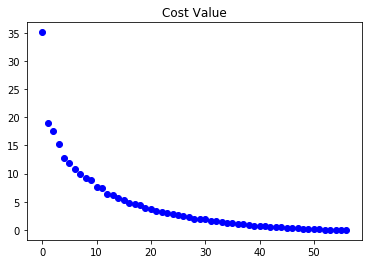

In [10]:
u,s,v = np.linalg.svd(X_std.T)
s
from matplotlib import pyplot as plt

k_array = []
cost_array = []
# Train k-Means with k values in [2,10] and calculate WSSSE for each clustering
for k in range(0,len(s)):
    cost_array.append(s[k])
    k_array.append(k)
print(cost_array)
print(k_array)
plt.scatter(k_array, cost_array, c = 'blue')
plt.title("Cost Value")
plt.show()

In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
21.64352863775041
6.2955340363143355
5.445539381313991
4.099380212712964
2.849466937959404
2.4942597377483637
2.0838844389599123
1.7503790146050393
1.5195426426373189
1.3621226628420573
1.0191530774286732
0.9596825629527502
0.7064435291769651
0.670550553339391
0.5711603395001607
0.47761210506817575
0.3967766364320066
0.3595072236215871
0.3421269219553242
0.2670568444899871
0.23978994711547075
0.19979391895524393
0.17456494161305286
0.1521819415029695
0.1398065290505613
0.11589243445941602
0.10607693689137601
0.09326822051886906
0.06896071327960052
0.06720681309997553
0.06023298858799379
0.04765552735706704
0.042165131766209236
0.03666578827815401
0.026878741601044705
0.02259174545091074
0.01955049857030724
0.016323591601000532
0.013646006407460397
0.010306492539979275
0.007851435390105523
0.00658423807762951
0.004418495665516556
0.004157556721820785
0.0032720511750032955
0.0027626457454166175
0.0014616214313686049
0.0010109504559391127
0.000586395556633

In [12]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(57,1), 
                      eig_pairs[1][1].reshape(57,1)))

print('Matrix W:\n', matrix_w)



Matrix W:
 [[ 0.06508753  0.04085926]
 [-0.06708154  0.03415102]
 [ 0.01861581  0.02404831]
 [-0.14866588  0.18116446]
 [ 0.12042152 -0.03446476]
 [-0.00319155  0.13662438]
 [ 0.15807549  0.25051748]
 [ 0.12591157 -0.1030639 ]
 [ 0.14217838 -0.18160201]
 [ 0.13038281 -0.20858324]
 [-0.11475842  0.22227536]
 [ 0.13680204 -0.17236357]
 [-0.04435648 -0.00949793]
 [-0.10881852  0.03702422]
 [ 0.13063403 -0.03297768]
 [ 0.19505673 -0.00917574]
 [ 0.12939333 -0.1998376 ]
 [ 0.12512074  0.11582258]
 [ 0.13485027  0.06725487]
 [-0.04418533  0.12459455]
 [-0.08895925  0.11775511]
 [-0.09762176  0.17300752]
 [ 0.15164916 -0.00498745]
 [ 0.19310817 -0.03729638]
 [-0.06164351  0.17742827]
 [ 0.17837011  0.02493912]
 [ 0.18204853 -0.0723386 ]
 [-0.12331496  0.07488929]
 [ 0.1621376   0.2274743 ]
 [ 0.18482371  0.1565979 ]
 [ 0.17924094 -0.06963983]
 [ 0.17850169 -0.06760066]
 [ 0.13372922 -0.02955663]
 [ 0.04620177  0.17342323]
 [ 0.19168672  0.08391039]
 [ 0.18552347  0.02297497]
 [-0.08461275  0.

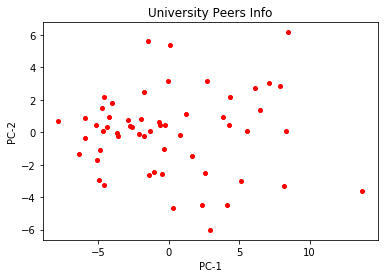

In [13]:
from matplotlib import pyplot as plt
Y = X_std.dot(matrix_w)

data = Y
plt.scatter(data[:,0], data[:,1], c='red', s=16)
# Define axis labels and plot title
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title('University Peers Info')
plt.show()

In [53]:
def k_mean_cluster(data, k):
    randi = np.random.randint(0, len(data), size=k)
    clusters = []
    m = []
    num_of_iter = 0
    MAX = 10000
    for i in randi:
        m.append(data[i])

    while num_of_iter != MAX:
        clusters = [[] for i in range(k)]
        b = list(range(len(data)))
        m_new = []

        # find nearest m
        for i, x in enumerate(data):
            dist = []
            for j in m:
                dist.append(np.linalg.norm(np.array(x) - np.array(j)))
            label = dist.index(min(dist))
            clusters[label].append(x)
            b[i] = label

        # compute new m
        for c in clusters:
            if len(c) == 0:
                m_new.append(data[np.random.randint(0, len(data), size=1)[0]])
            else:
                m_new.append(list(np.mean(c, axis=0)))

        num_of_iter += 1

        if np.array_equal(m, np.array(m_new)):
            break

        m = m_new

    colors = ['red', 'blue', 'orange', 'black', 'green', 'purple', 'pink', 'brown', 'darkred', 'm']
    for i in range(len(data)):
        plt.scatter(data[i, 0], data[i, 1], color=colors[b[i]], marker='.', s = 64)


    if num_of_iter == MAX:
        print("Too many iterations", num_of_iter)
    else:
        print("Converged", num_of_iter)
        
    return [dunn_index(clusters), num_of_iter]

Converged 14


[0.3905076752787912, 14]

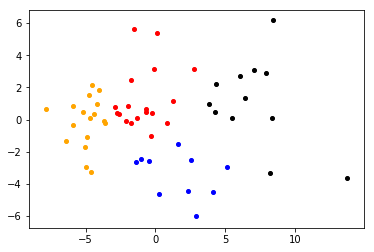

In [54]:
k_mean_cluster(data, 4)

Converged 4
[0.4821818962425446, 4]


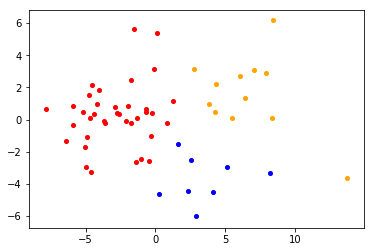

In [46]:
x = k_mean_cluster(data, 3)
print(x)

Converged 10
[0.28985675342650447, 10]


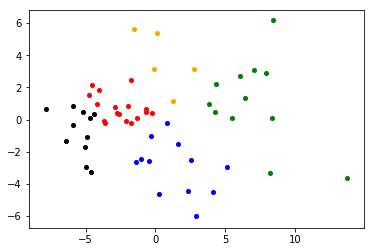

In [45]:
x = k_mean_cluster(data, 5)
print(x)

Converged 7
[0.33219876647423224, 7]


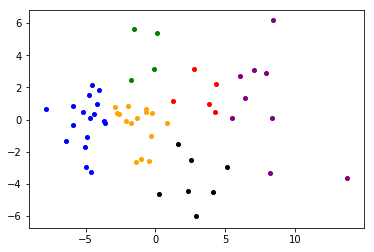

In [44]:
x = k_mean_cluster(data, 6)
print(x)

Converged 12
[0.41114000078642426, 12]


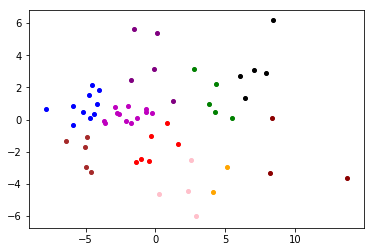

In [43]:
x = k_mean_cluster(data, 10)
print(x)

In [55]:
#For this part of my project, I took direct help from web
def dunn_index(clusters):
    intra = []
    inter = []

    for i, c in enumerate(clusters):
        # calculate intra distance within each cluster
        if len(c) == 1:
            intra.append(0)
            continue
        dist = []
        x1 = 0
        while x1 < (len(c)-1):
            x2 = x1+1
            while x2 < len(c):
                dist.append(np.linalg.norm(np.array(c[x1]) - np.array(c[x2])))
                x2 += 1
            x1 += 1
        intra.append(max(dist))

        # calculate inter distance within all clusters
        for j in range(i+1, len(clusters)):
            mean1 = list(np.mean(clusters[i], axis=0))
            mean2 = list(np.mean(clusters[j], axis=0))
            inter.append(np.linalg.norm(np.array(mean1) - np.array(mean2)))

    return min(inter)/max(intra)

In [20]:
import csv
import re
with open('IPEDS-big-trimmed.csv') as csvfile:
    rows = csv.reader(csvfile)
    res = list(zip(*rows))

n_headerExcluded = 0
new_data_list = []
for row in res:
    new_row = []
    for item in row:
        new_item = re.sub('[^A-Za-z0-9\.?]', '', item)
        if(new_item == '' or new_item == 'NA'):
            new_item = 0
        new_row.append(new_item)
    new_data_list.append(new_row)


k = list(map(list, zip(*new_data_list)))
#print(k)

import csv
with open("clean_data_21.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(k)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
global headers

df = pd.read_csv('clean_data_21.csv')
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,UnitID,InstitutionName,Averagenetpricestudentsawardedgrantorscholarshipaid201516SFA1516,PercentoffulltimefirsttimeundergraduatesawardedanyfinancialaidSFA1516,AverageamountoffederalstatelocalorinstitutionalgrantaidawardedSFA1516,Totalpriceforinstatestudentslivingoncampus201617DRVIC2016,Totalpriceforoutofstatestudentslivingoncampus201617DRVIC2016,PercentadmittedtotalDRVADM2016,PercentadmittedmenDRVADM2016,PercentadmittedwomenDRVADM2016,...,FulltimeenrollmentDRVEF2016,ParttimeenrollmentDRVEF2016,GraduationratetotalcohortDRVGR2016,GraduationratemenDRVGR2016,GraduationratewomenDRVGR2016,GraduationrateBachelordegreewithin4yearstotalDRVGR2016,GraduationrateBachelordegreewithin5yearstotalDRVGR2016,GraduationrateBachelordegreewithin6yearstotalDRVGR2016,CorerevenuestotaldollarsDFR2005,TuitionandfeesasapercentofcorerevenuesDFR2005
2153,181853,YorkCollege,0,97,10379,26750,26750,50,57,45,...,372,52,49,36,59,42,60,68,5066337,61
2154,217059,YorkCollegeofPennsylvania,0,99,7503,32440,32440,61,63,60,...,3891,612,61,55,66,39,57,60,53435412,76
2155,141361,YoungHarrisCollege,0,100,21288,42455,42455,55,58,53,...,1109,91,47,37,53,39,42,42,14231078,30
2156,206695,YoungstownStateUniversity,11271,97,7258,22042,22282,67,66,68,...,9497,3146,30,29,32,11,25,31,153729326,41
2157,458575,ZaytunaCollege,0,50,31175,38460,38460,68,61,74,...,61,0,50,50,50,50,50,50,0,0


Index(['UnitID', 'InstitutionName',
       'Averagenetpricestudentsawardedgrantorscholarshipaid201516SFA1516',
       'PercentoffulltimefirsttimeundergraduatesawardedanyfinancialaidSFA1516',
       'AverageamountoffederalstatelocalorinstitutionalgrantaidawardedSFA1516',
       'Totalpriceforinstatestudentslivingoncampus201617DRVIC2016',
       'Totalpriceforoutofstatestudentslivingoncampus201617DRVIC2016',
       'PercentadmittedtotalDRVADM2016', 'PercentadmittedmenDRVADM2016',
       'PercentadmittedwomenDRVADM2016', 'Fulltimeretentionrate2016EF2016D',
       'Parttimeretentionrate2016EF2016D', 'UndergraduateenrollmentDRVEF2016',
       'GraduateenrollmentDRVEF2016',
       'NondegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'ContinuingdegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'TransferindegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'FirsttimedegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'Fulltimegraduat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Converged 90


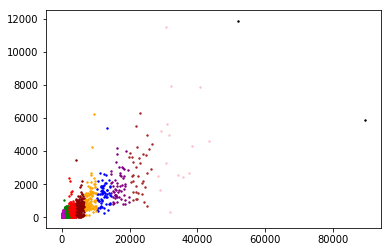

In [22]:

print(df.columns)
print(df.as_matrix(columns=df.columns[15:17]))


k_mean_cluster(df.as_matrix(columns=df.columns[15:17]), 10)

Index(['UnitID', 'InstitutionName',
       'Averagenetpricestudentsawardedgrantorscholarshipaid201516SFA1516',
       'PercentoffulltimefirsttimeundergraduatesawardedanyfinancialaidSFA1516',
       'AverageamountoffederalstatelocalorinstitutionalgrantaidawardedSFA1516',
       'Totalpriceforinstatestudentslivingoncampus201617DRVIC2016',
       'Totalpriceforoutofstatestudentslivingoncampus201617DRVIC2016',
       'PercentadmittedtotalDRVADM2016', 'PercentadmittedmenDRVADM2016',
       'PercentadmittedwomenDRVADM2016', 'Fulltimeretentionrate2016EF2016D',
       'Parttimeretentionrate2016EF2016D', 'UndergraduateenrollmentDRVEF2016',
       'GraduateenrollmentDRVEF2016',
       'NondegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'ContinuingdegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'TransferindegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'FirsttimedegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'Fulltimegraduat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Converged 35


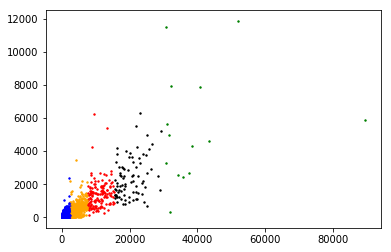

In [23]:
print(df.columns)
print(df.as_matrix(columns=df.columns[5:10]))


k_mean_cluster(df.as_matrix(columns=df.columns[15:17]), 5)

Index(['UnitID', 'InstitutionName',
       'Averagenetpricestudentsawardedgrantorscholarshipaid201516SFA1516',
       'PercentoffulltimefirsttimeundergraduatesawardedanyfinancialaidSFA1516',
       'AverageamountoffederalstatelocalorinstitutionalgrantaidawardedSFA1516',
       'Totalpriceforinstatestudentslivingoncampus201617DRVIC2016',
       'Totalpriceforoutofstatestudentslivingoncampus201617DRVIC2016',
       'PercentadmittedtotalDRVADM2016', 'PercentadmittedmenDRVADM2016',
       'PercentadmittedwomenDRVADM2016', 'Fulltimeretentionrate2016EF2016D',
       'Parttimeretentionrate2016EF2016D', 'UndergraduateenrollmentDRVEF2016',
       'GraduateenrollmentDRVEF2016',
       'NondegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'ContinuingdegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'TransferindegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'FirsttimedegreecertificateseekingundergraduateenrollmentDRVEF2016',
       'Fulltimegraduat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Converged 39


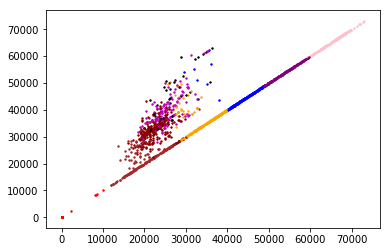

In [24]:
print(df.columns)
print(df.as_matrix(columns=df.columns[5:10]))


k_mean_cluster(df.as_matrix(columns=df.columns[5:17]), 10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Converged 88


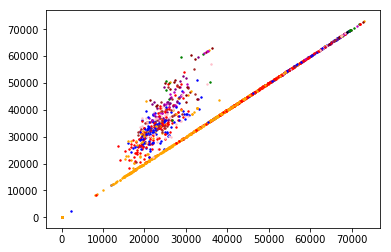

In [25]:

k_mean_cluster(df.as_matrix(columns=df.columns[5:40]), 10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Converged 85


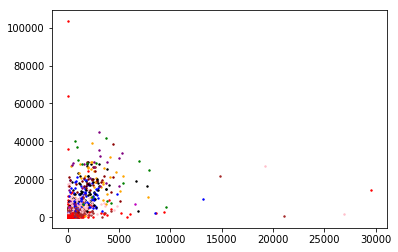

In [26]:
k_mean_cluster(df.as_matrix(columns=df.columns[20:40]), 10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Converged 41


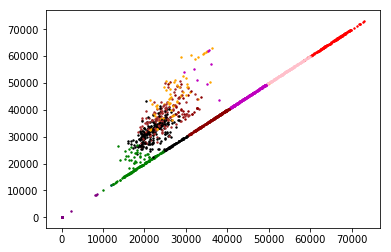

In [27]:
k_mean_cluster(df.as_matrix(columns=df.columns[5:20]), 10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Converged 9


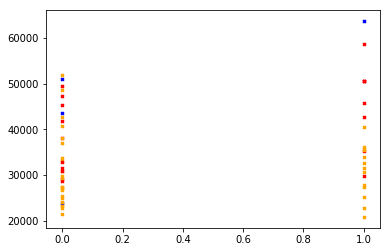

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
global headers

df = pd.read_csv('clean_data_11.csv')
k_mean_cluster(df.as_matrix(columns=df.columns[5:40]), 3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Converged 8


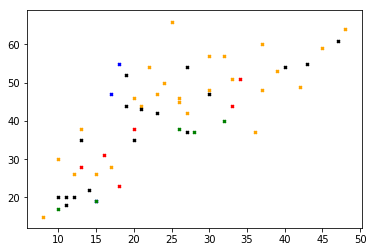

In [34]:
k_mean_cluster(df.as_matrix(columns=df.columns[20:25]), 5)